# Sentiment Analysis (Rise11 Solution)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.stem.porter import PorterStemmer

## Loading the data and preprocessing

In [4]:
# Load the dataset
data = pd.read_csv('train.csv')

In [5]:
#check if there is null data in dataset
data.isnull().sum()

text    0
Y       0
dtype: int64

In [6]:
#dropping null rows
data.dropna(inplace=True)
data.isnull().sum()

text    0
Y       0
dtype: int64

In [7]:
#checking for duplicate data
data['text'].duplicated().sum()

105

In [8]:
#removing duplicate data
data=data.drop_duplicates(keep=False)

In [9]:
data['text'].duplicated().sum()

0

In [10]:
#counting numbers of rows according to classes
data["Y"].value_counts()

2    17951
0    15334
1     7668
Name: Y, dtype: int64

In [11]:
data.head()

,text,Y
0,advice Talk neighbours family exchange phone n...,2
1,Coronavirus Australia: Woolworths give elderly...,2
2,"My food stock one empty... PLEASE, panic, THER...",2
3,"Me, ready go supermarket outbreak. Not I'm par...",0
4,As news regionÂs first confirmed COVID- case ...,2


### Removing Special Characters

In [12]:
def remove_special_characters(text):
    # Use a regular expression to keep only alphanumeric characters and spaces
    special_characters = r'[!@#^*()\{\}:,?+\-_`]'
    return ''.join(e for e in text if e.isalnum() or e.isspace() or e not in special_characters)

# Apply the function to the 'text_column'
data["text"]=data["text"].apply(remove_special_characters)

# Display the DataFrame
data.head()

,text,Y
0,advice Talk neighbours family exchange phone n...,2
1,Coronavirus Australia Woolworths give elderly ...,2
2,My food stock one empty... PLEASE panic THERE ...,2
3,Me ready go supermarket outbreak. Not I'm para...,0
4,As news regionÂs first confirmed COVID case c...,2


In [13]:
data['text'].isnull().sum()

0

In [14]:
#changing all capital letters to lower letters
data["text"]=data["text"].apply(lambda x:x.lower())
data.head(20)

,text,Y
0,advice talk neighbours family exchange phone n...,2
1,coronavirus australia woolworths give elderly ...,2
2,my food stock one empty... please panic there ...,2
3,me ready go supermarket outbreak. not i'm para...,0
4,as news regionâs first confirmed covid case c...,2
5,cashier grocery store sharing insights to prov...,2
6,was supermarket today. didn't buy toilet paper.,1
7,due covid retail store classroom atlanta open ...,2
8,for corona preventionwe stop buy things cash u...,0
9,all month crowding supermarkets restaurants ho...,1


In [15]:
# removed the rows composed of spaces after removing special characters
data=data[data.text.str.strip().ne("") & data.text.notnull()]
data.head(20)

,text,Y
0,advice talk neighbours family exchange phone n...,2
1,coronavirus australia woolworths give elderly ...,2
2,my food stock one empty... please panic there ...,2
3,me ready go supermarket outbreak. not i'm para...,0
4,as news regionâs first confirmed covid case c...,2
5,cashier grocery store sharing insights to prov...,2
6,was supermarket today. didn't buy toilet paper.,1
7,due covid retail store classroom atlanta open ...,2
8,for corona preventionwe stop buy things cash u...,0
9,all month crowding supermarkets restaurants ho...,1


### Stemming

In [16]:
ps=PorterStemmer()
def stem(text):
  y=[]
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)

In [17]:
#performing stemming using porter stemmer
data["text"]=data["text"].apply(stem)

In [18]:
data.head()

,text,Y
0,advic talk neighbour famili exchang phone numb...,2
1,coronaviru australia woolworth give elderli di...,2
2,my food stock one empty... pleas panic there w...,2
3,me readi go supermarket outbreak. not i'm para...,0
4,as news regionâ first confirm covid case came...,2


## Feature Extraction, Balancing and spliting the data

In [19]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000,stop_words="english")
X = vectorizer.fit_transform(data['text'])
y = data['Y']

In [20]:
#balancing the number of labels (making them equal)
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

In [21]:
y_smote.value_counts()

2    17951
0    17951
1    17951
Name: Y, dtype: int64

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)



## Model Training

### Model 1 : Naive Bayes Classifier

In [23]:
# Model selection and training
model1 = MultinomialNB()
model1.fit(X_train, y_train)

MultinomialNB()

In [24]:
# Model evaluation
y_pred11 = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred11)
report = classification_report(y_test, y_pred11)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
y_pred12 = model1.predict(X_train)
accuracy = accuracy_score(y_train, y_pred12)
report = classification_report(y_train, y_pred12)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.7090335159223842
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71      3582
           1       0.72      0.71      0.71      3612
           2       0.70      0.70      0.70      3577

    accuracy                           0.71     10771
   macro avg       0.71      0.71      0.71     10771
weighted avg       0.71      0.71      0.71     10771

Accuracy: 0.7567661668446218
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76     14369
           1       0.77      0.75      0.76     14339
           2       0.75      0.76      0.75     14374

    accuracy                           0.76     43082
   macro avg       0.76      0.76      0.76     43082
weighted avg       0.76      0.76      0.76     43082



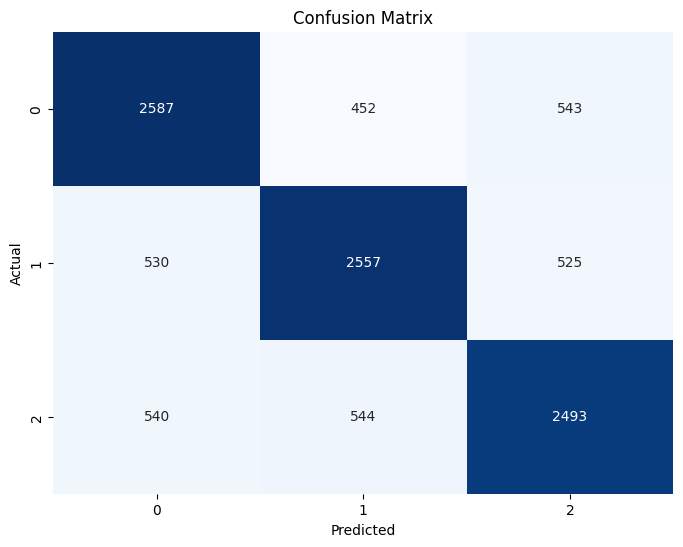

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred11)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Model 2 : Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter=10000)
model2.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [27]:
# Model evaluation
y_pred21 = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred21)
report = classification_report(y_test, y_pred21)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
y_pred22 = model2.predict(X_train)
accuracy = accuracy_score(y_train, y_pred22)
report = classification_report(y_train, y_pred22)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.8105097019775322
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78      3582
           1       0.77      0.89      0.83      3612
           2       0.84      0.80      0.82      3577

    accuracy                           0.81     10771
   macro avg       0.81      0.81      0.81     10771
weighted avg       0.81      0.81      0.81     10771

Accuracy: 0.8562508704331275
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83     14369
           1       0.83      0.91      0.87     14339
           2       0.88      0.86      0.87     14374

    accuracy                           0.86     43082
   macro avg       0.86      0.86      0.86     43082
weighted avg       0.86      0.86      0.86     43082



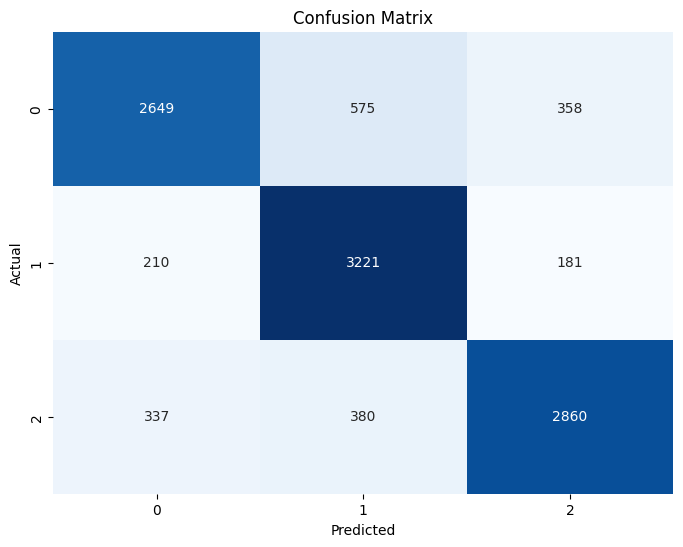

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred21)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Model 3 : Support Vector Classifier

In [29]:
from sklearn.svm import SVC
model3 = SVC(kernel='linear')
model3.fit(X_train, y_train)

SVC(kernel='linear')

In [30]:
# Model evaluation
y_pred31 = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred31)
report = classification_report(y_test, y_pred31)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
y_pred32 = model3.predict(X_train)
accuracy = accuracy_score(y_train, y_pred32)
report = classification_report(y_train, y_pred32)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.8173800018568378
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78      3582
           1       0.79      0.90      0.84      3612
           2       0.85      0.80      0.83      3577

    accuracy                           0.82     10771
   macro avg       0.82      0.82      0.82     10771
weighted avg       0.82      0.82      0.82     10771

Accuracy: 0.8669049719140244
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84     14369
           1       0.84      0.91      0.88     14339
           2       0.89      0.87      0.88     14374

    accuracy                           0.87     43082
   macro avg       0.87      0.87      0.87     43082
weighted avg       0.87      0.87      0.87     43082



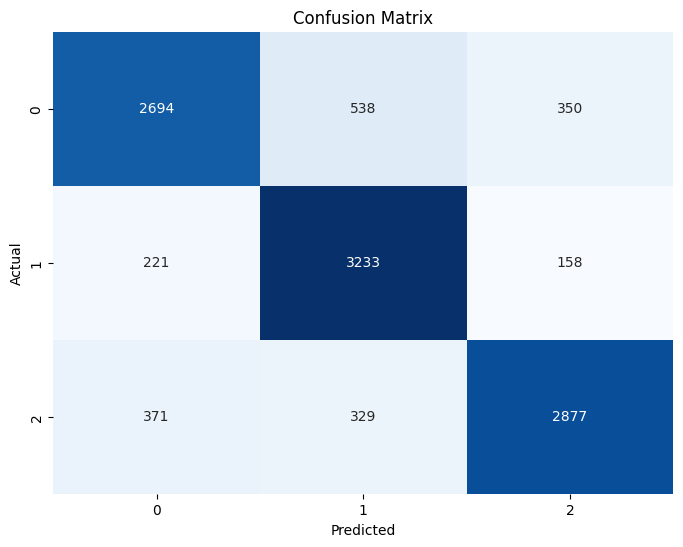

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred31)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Ensembling the Above 3 models

In [32]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('model2', model2), ('model3', model3),('model1', model1)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [33]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

0.8134806424658806

## Neural Network Deep Learning Model

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Tokenize the text data
max_words = 5000  # Set based on your vocabulary size
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(data['text'])
X = tokenizer.texts_to_sequences(data['text'])
X_padded = pad_sequences(X)

# Encode the sentiment labels
y = LabelEncoder().fit_transform(data['Y'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Define the neural network model
embedding_dim = 50
model6 = Sequential()
model6.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=X_padded.shape[1]))
model6.add(LSTM(100))
model6.add(Dense(3, activation='softmax'))

# Compile the model
model6.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model6.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

y_pred6 = model6.predict(X_test)
y_pred61 = y_pred6.argmax(axis=1)

y_pred6 = model6.predict(X_train)
y_pred62 = y_pred6.argmax(axis=1)

# Evaluate the model on the test data
loss, accuracy = model6.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

loss, accuracy = model6.evaluate(X_train, y_train)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/5
819/819 [==============================] - 34s 37ms/step - loss: 0.6917 - accuracy: 0.7024 - val_loss: 0.5059 - val_accuracy: 0.8173
Epoch 2/5
819/819 [==============================] - 8s 10ms/step - loss: 0.4283 - accuracy: 0.8493 - val_loss: 0.4672 - val_accuracy: 0.8325
Epoch 3/5
819/819 [==============================] - 7s 9ms/step - loss: 0.3696 - accuracy: 0.8735 - val_loss: 0.4850 - val_accuracy: 0.8296
Epoch 4/5
819/819 [==============================] - 6s 7ms/step - loss: 0.3312 - accuracy: 0.8879 - val_loss: 0.5046 - val_accuracy: 0.8246
Epoch 5/5
256/256 [==============================] - 1s 4ms/step - loss: 0.5252 - accuracy: 0.8198
Test Loss: 0.5251699686050415, Test Accuracy: 0.8197582364082336
1024/1024 [==============================] - 4s 4ms/step - loss: 0.2970 - accuracy: 0.9027
Test Loss: 0.29704535007476807, Test Accuracy: 0.902665376663208


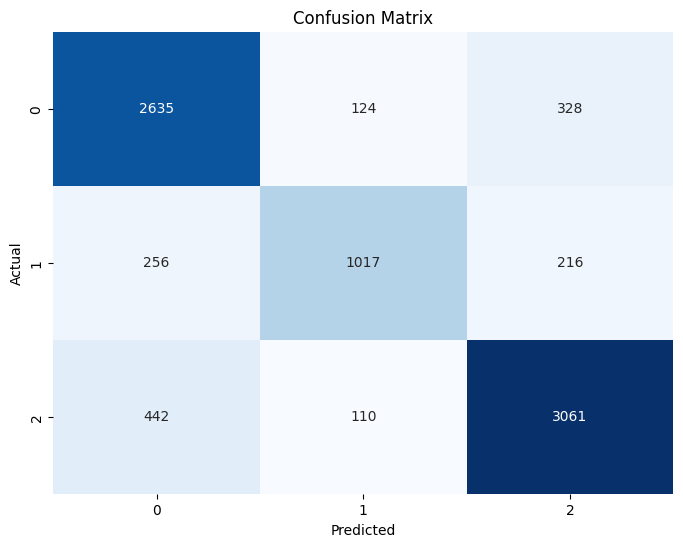

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred61)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()